In [2]:

pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/626.3 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 245.8/626.3 kB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Columns in the dataset: Index(['Date', 'Comment'], dtype='object')
First few rows of the data:
                  Date                                            Comment
0  2024-11-29 04:58:54   If only tata can better their after sale service
1  2024-11-29 04:52:11  https://preview.redd.it/qo72fcycur3e1.jpeg?wid...
2  2024-11-29 04:37:05  I really resonate with the idea of Tata Motors...
3  2024-11-29 04:00:13  And most likely it’s going only down from here...
4  2024-11-29 03:51:32  Exactly came here to post this. There are many...

Average Sentiment Polarity: 0.07879751973849197
Processed data with sentiment scores saved to 'tata_sentiment_analysis.csv'


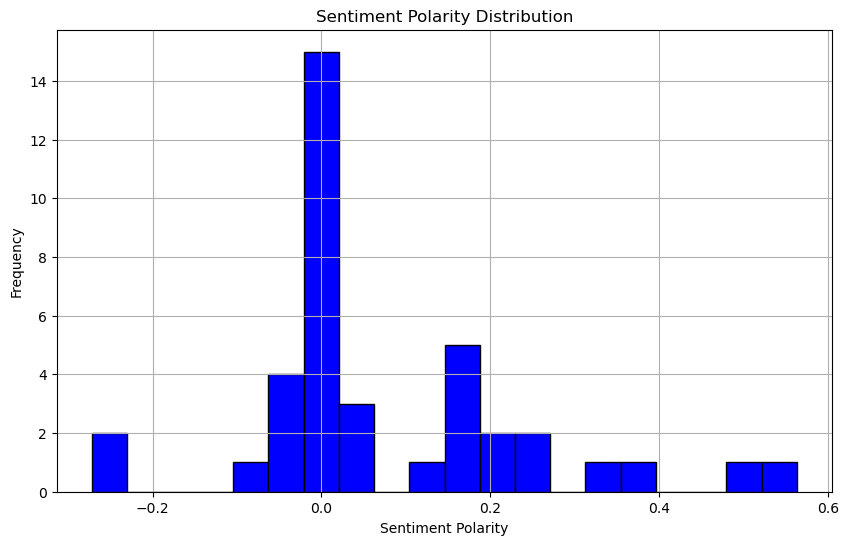

In [7]:
# Import necessary libraries
import pandas as pd
import re
from textblob import TextBlob

# Step 1: Load the data
file_path = 'tata.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Step 2: Inspect the data
print("Columns in the dataset:", data.columns)
print("First few rows of the data:")
print(data.head())

# Assume the column with comments is named 'comments'. Update if needed.
if 'Comment' in data.columns:
    text_column = 'Comment'
else:
    raise ValueError("The column with comments was not found. Please check the dataset.")

# Step 3: Clean the text data
def clean_text(text):
    """
    Function to clean text by removing URLs, special characters, and extra spaces.
    """
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_text'] = data[text_column].apply(lambda x: clean_text(str(x)))

# Step 4: Perform Sentiment Analysis
def get_sentiment(text):
    """
    Function to calculate sentiment polarity using TextBlob.
    """
    return TextBlob(text).sentiment.polarity

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

# Step 5: Aggregate Sentiment Scores
average_sentiment = data['sentiment'].mean()
print(f"\nAverage Sentiment Polarity: {average_sentiment}")

# Step 6: Save the processed data with sentiment scores
output_file = 'tata_sentiment_analysis.csv'
data.to_csv(output_file, index=False, encoding='utf-8')
print(f"Processed data with sentiment scores saved to '{output_file}'")

# Optional: Plot Sentiment Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment'], bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [19]:
data[['Date', 'Time']] = data['Date'].str.split(' ', expand=True)
print("\nAfter splitting the Date column:")
print(data.head())


After splitting the Date column:
         Date                                            Comment      Time
0  2024-11-29   If only tata can better their after sale service  04:58:54
1  2024-11-29  https://preview.redd.it/qo72fcycur3e1.jpeg?wid...  04:52:11
2  2024-11-29  I really resonate with the idea of Tata Motors...  04:37:05
3  2024-11-29  And most likely it’s going only down from here...  04:00:13
4  2024-11-29  Exactly came here to post this. There are many...  03:51:32
